In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import keras
from keras.utils import np_utils
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout,Activation
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [4]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


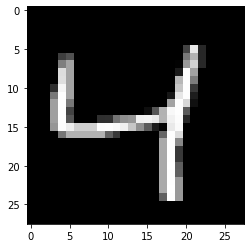

In [6]:
plt.imshow(X_train[2],cmap='gray')
plt.show()

In [7]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [8]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

In [9]:
print(X_train.shape,X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [10]:
Y_train=np_utils.to_categorical(Y_train)
Y_test=np_utils.to_categorical(Y_test)

In [11]:
print(Y_train.shape,Y_test.shape)

(60000, 10) (10000, 10)


In [12]:
model=Sequential()
model.add(Conv2D(64,activation='relu',kernel_size=3,input_shape=(28,28,1),padding='same'))
model.add(Conv2D(64,activation='relu',kernel_size=3,padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,activation='relu',kernel_size=3,padding='same'))
model.add(Flatten())
model.add(Dense(30))
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

W0203 19:13:28.675335  2516 deprecation_wrapper.py:119] From c:\users\nikhil jain\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0203 19:13:28.702230  2516 deprecation_wrapper.py:119] From c:\users\nikhil jain\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0203 19:13:28.705222  2516 deprecation_wrapper.py:119] From c:\users\nikhil jain\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0203 19:13:28.740128  2516 deprecation_wrapper.py:119] From c:\users\nikhil jain\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.m

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        9232      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                94110     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
__________

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

W0203 19:15:54.624114  2516 deprecation_wrapper.py:119] From c:\users\nikhil jain\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0203 19:15:54.653881  2516 deprecation_wrapper.py:119] From c:\users\nikhil jain\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [14]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),nb_epoch=10,batch_size=20,verbose=2)

c:\users\nikhil jain\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0203 19:16:46.730198  2516 deprecation.py:323] From c:\users\nikhil jain\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 87s - loss: 0.1431 - acc: 0.9575 - val_loss: 0.0445 - val_acc: 0.9860
Epoch 2/10
 - 81s - loss: 0.0560 - acc: 0.9828 - val_loss: 0.0369 - val_acc: 0.9882
Epoch 3/10
 - 80s - loss: 0.0427 - acc: 0.9871 - val_loss: 0.0308 - val_acc: 0.9900
Epoch 4/10
 - 79s - loss: 0.0351 - acc: 0.9890 - val_loss: 0.0340 - val_acc: 0.9894
Epoch 5/10
 - 80s - loss: 0.0284 - acc: 0.9912 - val_loss: 0.0281 - val_acc: 0.9908
Epoch 6/10
 - 83s - loss: 0.0231 - acc: 0.9926 - val_loss: 0.0348 - val_acc: 0.9906
Epoch 7/10
 - 82s - loss: 0.0204 - acc: 0.9935 - val_loss: 0.0303 - val_acc: 0.9912
Epoch 8/10
 - 80s - loss: 0.0190 - acc: 0.9940 - val_loss: 0.0291 - val_acc: 0.9918
Epoch 9/10
 - 81s - loss: 0.0168 - acc: 0.9943 - val_loss: 0.0367 - val_acc: 0.9897
Epoch 10/10
 - 82s - loss: 0.0162 - acc: 0.9951 - val_loss: 0.0511 - val_acc: 0.9864


In [15]:
test_data=X_test[:11]

6


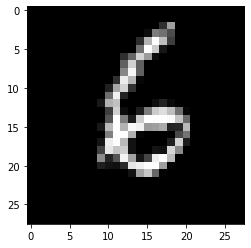

In [19]:
image_index=2000
plt.imshow(X_test[image_index].reshape(28,28),cmap='gray')
pred=model.predict(X_test[image_index].reshape(1,28,28,1))
print(pred.argmax())